In [25]:
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
full_data = pd.read_csv('data.csv', index_col=0);full_data

,benchmark,env,inst,count,time
0,alu,gpu,"v_add_f32 v1, v2, v3",0,0.000003
1,alu,gpu,"v_add_f32 v1, v2, v3",0,0.000003
2,alu,gpu,"v_add_f32 v1, v2, v3",0,0.000003
3,alu,gpu,"v_add_f32 v1, v2, v3",0,0.000003
4,alu,gpu,"v_add_f32 v1, v2, v3",0,0.000003
5,alu,gpu,"v_add_f32 v1, v2, v3",0,0.000003
6,alu,gpu,"v_add_f32 v1, v2, v3",0,0.000003
7,alu,gpu,"v_add_f32 v1, v2, v3",0,0.000003
8,alu,gpu,"v_add_f32 v1, v2, v3",0,0.000003
9,alu,gpu,"v_add_f32 v1, v2, v3",0,0.000003


In [27]:
data = full_data.groupby(['inst', 'count']).agg(np.mean).reset_index();
data

,inst,count,time
0,"v_add_f32 v1, v2, v3",0,0.000003
1,"v_add_f32 v1, v2, v3",1,0.000003
2,"v_add_f32 v1, v2, v3",2,0.000003
3,"v_add_f32 v1, v2, v3",3,0.000003
4,"v_add_f32 v1, v2, v3",4,0.000003
5,"v_add_f32 v1, v2, v3",5,0.000003
6,"v_add_f32 v1, v2, v3",6,0.000003
7,"v_add_f32 v1, v2, v3",7,0.000003
8,"v_add_f32 v1, v2, v3",8,0.000003
9,"v_add_f32 v1, v2, v3",9,0.000003


(2e-06, 4e-06)

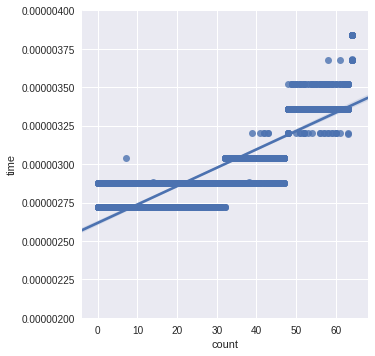

In [30]:
lm = sns.lmplot('count', 'time', full_data)
lm.axes[0, 0].set_ylim(2e-6, 4e-6)

In [31]:
data_wf = full_data[(full_data['inst']=='v_add_f32 v1, v2, v3') & (full_data['env']=='gpu')];data_wf
result = sm.ols(formula="time ~ count", data=data_wf).fit()
result.params

Intercept    2.617568e-06
count        1.195462e-08
dtype: float64